# 3 Combinaisons

In [105]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import adjusted_rand_score

## 3.1 Éxécution de certaines partitions

In [82]:
# Vecteurs
all_vectors = list()

dimensions = [10,100]

for dim in dimensions : 
    nmf = NMF(n_components=dim, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf.T).components_.T
    lda = LatentDirichletAllocation(n_components=dim, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf.T).components_.T
    all_vectors.append(['NMF',dim,nmf])
    all_vectors.append(['LDA',dim,lda])

In [103]:
# Clusters
all_clusters = list()

affinities = ['cosine','euclidean']
linkages = ['complete','single']
n_clusters = [10,20,50]
for name, dim, vec in all_vectors:
    for affinity in affinities:
        for linkage in linkages:
            for n_cl in n_clusters:
                agg_clusts = AgglomerativeClustering(linkage=linkage, affinity=affinity, n_clusters=n_cl).fit(vec).labels_
                all_clusters.append([name,dim,affinity,linkage,n_cl,agg_clusts])


In [104]:
# " dataframe"
dfcl = pd.DataFrame(all_clusters,columns = ['name','dim','affinity','linkage','n_cl','labels'])

## 3.2 Comparaison des partitions

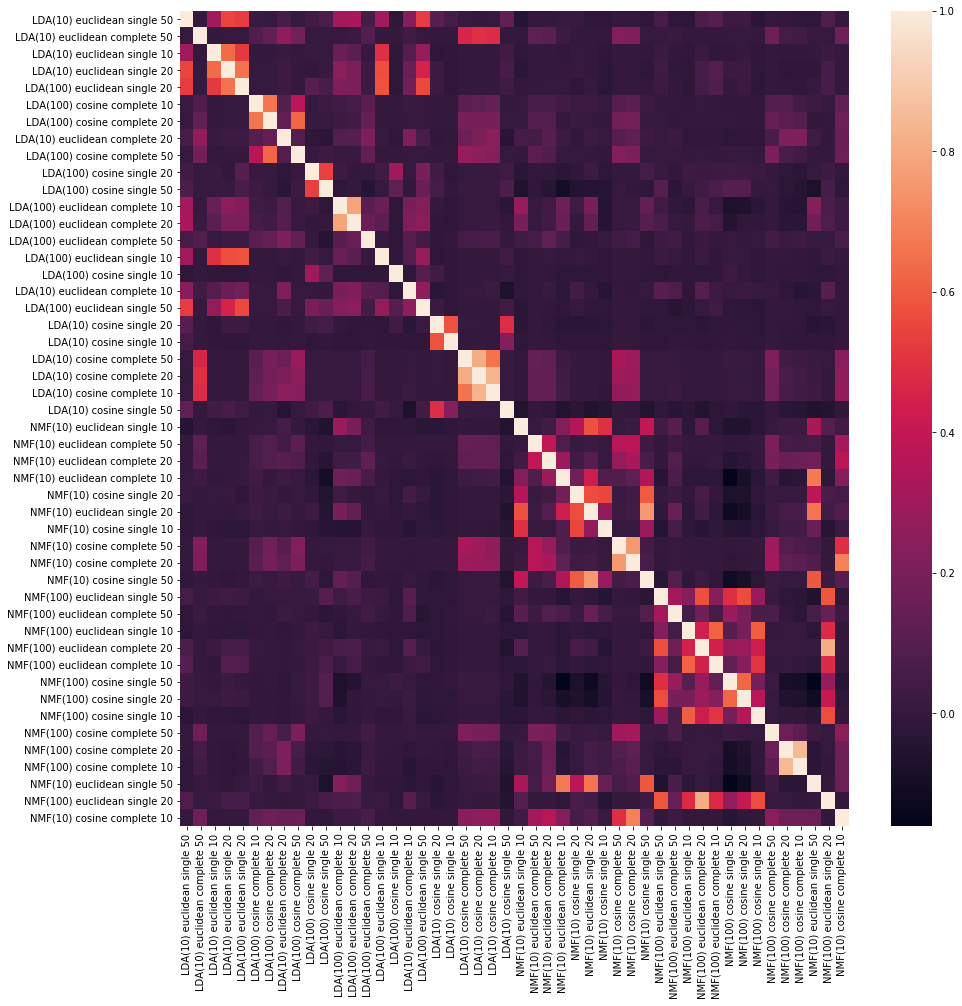

In [106]:
plt.figure(figsize = (15,15))
dfclt = dfcl.sort_values(by = 'name')
partitions = np.array([i for i in dfclt.labels])
partition_names = dfclt.name+'('+dfclt.dim.apply(str)+') ' +dfclt.affinity+' '+dfclt.linkage+' '+dfclt.n_cl.apply(str)
matrix_ARI = pairwise_distances(partitions,metric = adjusted_rand_score)
sns.heatmap(matrix_ARI, xticklabels=partition_names, yticklabels=partition_names);

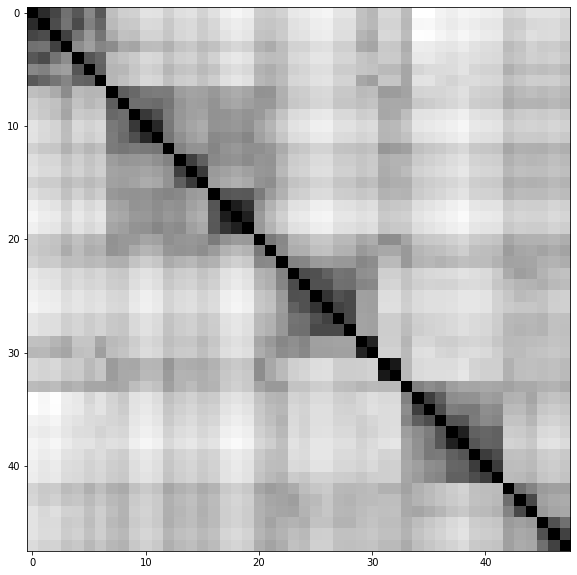

In [107]:
from pyclustertend import vat
vat(matrix_ARI)

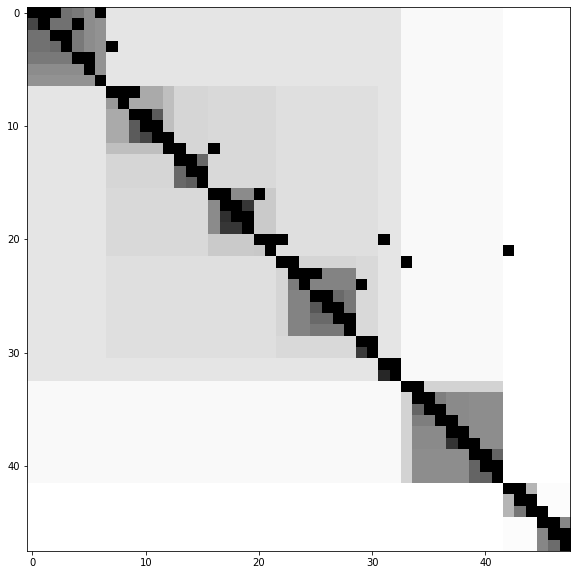

In [108]:
from pyclustertend import ivat
ivat(matrix_ARI)

In [45]:
# Tentative avortée de labelliser
# matrix_ARI = [[0,2,3],[2,0,4],[3,3,0]]
# ordered = pyclustertend.visual_assessment_of_tendency.compute_ordered_dissimilarity_matrix(matrix_ARI)
# for num, line in enumerate(matrix_ARI) :
#     for num_ordre,line_ordre in enumerate(ordered) :
#         if (line == line_ordre).all() :
#             print(num,'->',num_ordre)
# ordered

## 3.3 Combiner les partitions

In [46]:
# import Cluster_Ensembles as CE
# cluster_runs = np.random.randint(0, 50, (50, 15000))
# consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 50)
# consensus_clustering_labels
# Problème de versions : reduce dans functools pour Python3 mais pas Python2

In [47]:
# https://naeglelab.github.io/OpenEnsembles/Examples/Ensemble_Distances_Algorithms_No_Structure.html
# import openensembles as oe

In [48]:
# df = pd.DataFrame(partitions).T
# nbl, dims = df.shape

In [49]:
# dataObj = oe.data(df,range(dims))
# Problème : la bibliothèque utilise les mêmes données avec des méthodes de clustering différentes, 
# tandis que nous avons besoin de données différentes

In [110]:
# Choix du nombre d'objets
nb_obj = 100
objets = partitions.T[:nb_obj]

### 3.3.1 CO

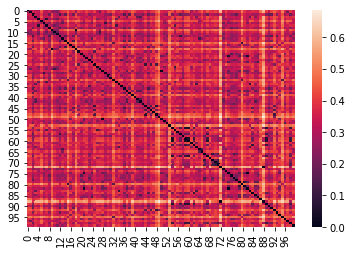

In [111]:
# Matrix
co_matrix = pairwise_distances(objets,metric = lambda x,y : 1- sum(x==y)/len(x))
sns.heatmap(co_matrix);

In [112]:
# CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%time Z = linkage(objets,metric= lambda x,y : 1- sum(x==y)/len(x),method = 'complete');

CPU times: user 600 ms, sys: 4 ms, total: 604 ms
Wall time: 603 ms


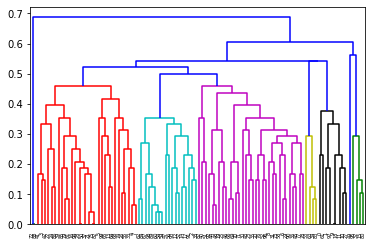

In [113]:
dendrogram(Z);

### 3.3.2 Normalized mutual information

In [114]:
from sklearn.metrics.cluster import normalized_mutual_info_score

CPU times: user 6.34 s, sys: 0 ns, total: 6.34 s
Wall time: 6.34 s


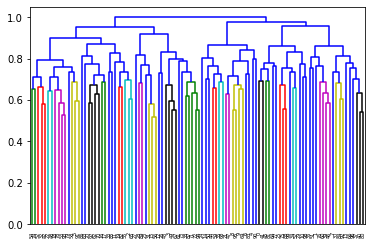

In [115]:
%time Z = linkage(objets,metric= normalized_mutual_info_score, method = 'complete');
dendrogram(Z);